# Introduction to Data Science 
# Lecture 19: Clustering 2
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

In this lecture, we'll continue our discussion of clustering, covering
* distances
* hierarchical clustering 
* dendogram plots and heatmaps
* DBSCAN
* A comparison of clustering methods on MNIST digits

Recommended Reading:
* G. James, D. Witten, T. Hastie, and R. Tibshirani, An Introduction to Statistical Learning, Ch. 10.1 and 10.3. [digitial version available here](https://www.statlearning.com/)
* J. Grus, Data Science from Scratch, Ch. 19
* [scikit-learn documentation on clustering](http://scikit-learn.org/stable/modules/clustering.html)
* [Jörn's SciPy Hierarchical Clustering and Dendrogram Tutorial](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/)

## Recap: Partitional Clustering with K-Means

[Clustering](https://en.wikipedia.org/wiki/Cluster_analysis) is the task of discovering unknown subgroups in data, which we call *clusters*.  In other words, the **goal** is to partition the datset into clusters where ‘similar’ items are in the same cluster and ‘dissimilar’ items are in different clusters. 

**Examples:**
* Social Network Analysis: Clustering can be used to find communities.
* Ecology: cluster organisms that share attributes into species, genus, etc...
* Genetics: cluster tissue samples by similar gene expression. 
* Handwritten digits where the digits are unknown.

## The k-means clustering method

**Data:**  A collection of points $\{x_i\}$, for $i = 1,\ldots n$, where $x_i\in \mathbb R^d$. 

In [k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering), one tries to find $k$ *centers*, $\{\mu_\ell\}$, $\ell = 1,\ldots k$, and assign each point $x$ to a *cluster* $C_\ell$ with center $\mu_\ell$, as to minimize the *total intra-cluster distance* 
$$
\arg\min_{C} \sum_{\ell=1}^k \sum_{x_i \in C_\ell} \| x_i - \mu_\ell\|^2. 
$$
Here, $\mu_\ell$ is the mean of points in $C_\ell$. The total intra-cluster distance is the total squared Euclidean distance from each point to the center of its cluster. It's a measure of the variance or internal coherence of the clusters. 

We can take a look at an interactive illustration:
https://www.naftaliharris.com/blog/visualizing-k-means-clustering/
### Lloyd's Algorithm


**Input:** set of points $x_1,\ldots, x_n$ and an integer $k$ (# clusters)

Pick $k$ starting points as centers $\mu_1, \ldots, \mu_k$.

**while** not converged:
1. Assign each point $x_i$, to the cluster $C_\ell$ with closest center $\mu_\ell$. 
2. For each cluster $C_\ell$, compute a new center, $\mu_\ell$, by taking the mean of all $x_i$ assigned to cluster $C_\ell$, *i.e.*, 
$$
\mu_\ell = \frac{1}{|C_\ell|}\sum_{x_i \in C_\ell} x_i
$$

## Lloyd's Algorithm Illustrated


![Lloyd's Algorithm Illustrated](lloyd.png)

### Performance and properties of k-means

* The run time is $O(n*k*d*i)$ where 
 - n is the number of items,
 - k is the number of clusters
 - d is the number of dimensions of the feature vectors
 - i is the number of iterations needed until convergence. 
 
  For data that has well-defined clusters, $i$ is typically small. In practice, the $k$-means algorithm is very fast. 

* Lloyds algorithm finds a *local optimum*, not necessarily the *global optimum*

  Since the algorithm is fast, it is common to run the algorithm multiple times and pick the solution with the smallest total intra-cluster distance, 
$$
\sum_{\ell=1}^k \sum_{x_i \in C_\ell} \| x_i - \mu_\ell\|^2. 
$$

* The total intra-cluster distance doesn't increase at every iteration of Lloyd's algorithm

* The total intra-cluster distance decreases with larger $k$

## Recap: Cluster Evaluation 

Recall that we discussed different methods for evaluating clusters, either with or without labels. 

#### Without ground-truth labels

+ Visual comparison
+ Use the total intra-cluster distance (useful for k-means)
+ [Silhouette analysis](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)


#### With ground-truth labels

+ [`homogeneity_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html): Homogeneity metric of a cluster labeling given a ground truth. A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
+ [`completeness_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html): A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
+ [`v_measure_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html): The V-measure is the harmonic mean between homogeneity and completeness:
$$
v = 2 * (homogeneity * completeness) / (homogeneity + completeness)
$$
+ [`homogeneity_completeness_v_measure`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_completeness_v_measure.html): Compute the homogeneity, completeness, and v-Measure scores at once.
+ Confusion matrix 

*Note:* Homogeneity score does NOT account for over-clustering and completeness score does NOT account for under-clustering. Thus it is important to combine these metrics.

## Measures of distance

All clustering methods operate on a measure of distance. There are various distance measures that are useful depending on the context.

+ **Euclidean distance**:
$$
d(x,y) = \sqrt{\sum_{i=1}^d (x_i - y_i)^2 }
$$
+ **Manhattan distance**:
$$
d(x,y) = \sum_{i=1}^d |x_i - y_i|
$$
Measures distance as you would travel in a grid, as in city blocks in Manhattan. 
+ **Correlation**: 
$$\frac{\sum ^n _{i=1}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum ^n _{i=1}(x_i - \bar{x})^2} \sqrt{\sum ^n _{i=1}(y_i - \bar{y})^2}}
$$
where $\bar{x}=\frac{1}{n}\sum_{i=1}^n x_i$ and $\bar{y}=\frac{1}{n}\sum_{i=1}^n y_i$ are the means. 
Note: correlation is a measure of *similarity* which is inversely related to distance.

+ **Jaccard Distance**: If $A$ and $B$ are two sets, we define the Jaccard similarity coefficient
$$
J(A,B) = \frac{ |A\cap B|}{ |A\cup B| }.
$$
We always have that $0 \leq J(A,B) \leq 1$. We then define the **Jaccard  distance** as 
$$
d(A,B) = 1 - J(A,B).
$$

### Which distance should you use when? 

* Euclidean distance works well for roughly normally distributed data, where absolute differences matter. 
* Manahttan distance works better with datasets with many outliers (that would be improbable in normally distributed data).
* Correlation measures work well if the absolute values aren't as important, but correlation is. An example use case is gene-expression data that is unitless and can only be compared in relative termes. 
* Jaccard Distance is useful for binary/categorical data. 

## Hierarchical Clustering

[Hierarchical Clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering) is a collection of methods for clustering, where we don't just find a single clustering of the data, but a hierarchy of clusters. There are two main strategies for hierarchical clustering:

+ **Agglomerative:** This "bottom up" approach to clustering starts with each data point in its own cluster. Pairs of clusters are merged as one moves up the hierarchy.

+ **Divisive:** This "top down" approach to clustering starts with all observations in one cluster. Splits of the clusters are made recursively as one moves down the hierarchy.

We'll focus on Agglomerative Clustering.


### Agglomerative clustering
* Start with each item as it’s own cluster.
+ Link together the two clusters that are 'closest together' and store this information in the dendrogram plot. 
+ Continue this process until there is only one cluster.
+ Using the dendrogram plot, decide which clustering is best.

<img src="dendrogram.png" width="500">

### Linkage methods in Agglomerative clustering:
* **Maximum or complete linkage**: the maximum distance between observations of pairs of clusters, 
$$
\max\{d(a,b)\colon a \in A, b \in B \}.
$$

* **Minimum or single linkage**: the minimum distance between observations of pairs of clusters, 
$$
\min\{d(a,b)\colon a \in A, b \in B \}.
$$

* **Average linkage**: the average of the distances between all observations of pairs of clusters,
$$
\frac{1}{|A| |B|} \sum_{a \in A, b \in B} d(a, b).
$$

* **Centroid distance**:  if $c_A$ and $c_B$ are the centers of clusters $A$ and $B$, then $d(c_A,c_B)$.

* **Ward** minimizes the total within-cluster distance, similiar to $k$-means.  

![Comparison of Clustering with Different Linkages](ComparisonOfClusteringMethods.png)

Image [source](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)

## Agglomerative Clustering in SciKit Learn

We can use SciKit Learn's [agglomerative clustering implementation](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering). 

In [1]:
import numpy as np

from scipy.cluster import hierarchy 

from sklearn import metrics
from sklearn.datasets import make_blobs, make_moons, load_iris, load_digits
from sklearn.cluster import *
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import homogeneity_score, homogeneity_completeness_v_measure
from sklearn.preprocessing import scale

from time import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Create color maps
#cmap = ListedColormap(["Red","Green","Blue"])
color_array = ["#984ea3","#a65628","#ffff33","#4daf4a","#ff7f00", "#e41a1c", "#377eb8"]
cmap = ListedColormap(color_array)
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

Here, we pass a number of clusters, because we can't see the hierarchy in this plot. Try changing the number of clusters to understand the behavior. 

c:\Users\logan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


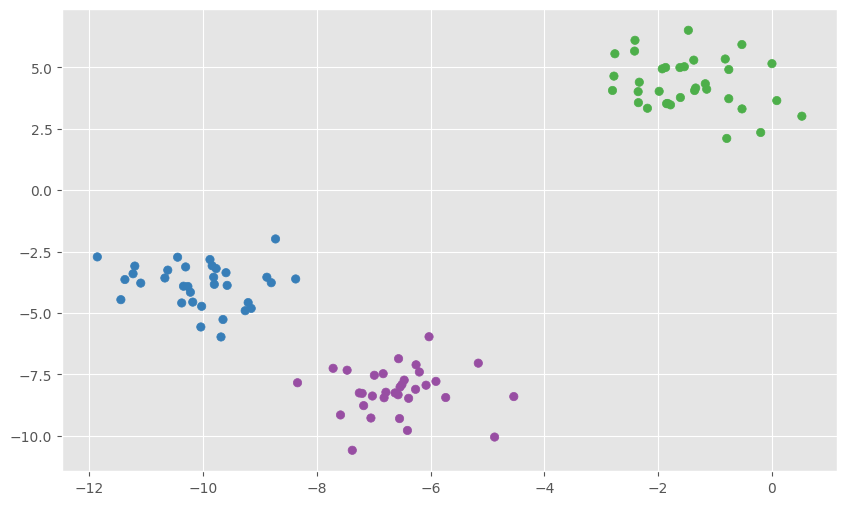

In [2]:
X, y = make_blobs(n_samples=100, centers=3, random_state=1)

# if we know there are 3 clusters
agg_cluster_model = AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=3)
y_pred = agg_cluster_model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap); 

### Making a dendogram plot

A [dendogram plot](https://en.wikipedia.org/wiki/Dendrogram) can be used to decide on the number of clusters.

The `scipy.cluster.hierarchy` function [`linkage`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) returns an array of length $n-1$ that contains all cluster merging information. Each row has the format 
`[idx1, idx2, dist, sample_count]`.

The `scipy.cluster.hierarchy` function [`fcluster`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.fcluster.html) can then be used to extract the clusters from the linkage array and [`dendrogram`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram) to display the array.

In [3]:
Z = hierarchy.linkage(X, 'ward') # generate the linkage array
print(Z[20:40])

[[ 72.         108.           0.2745888    3.        ]
 [ 37.          43.           0.27544288   2.        ]
 [ 17.          78.           0.27777199   2.        ]
 [ 60.          70.           0.28414934   2.        ]
 [ 50.         102.           0.29188241   3.        ]
 [ 76.          98.           0.29968369   2.        ]
 [107.         114.           0.31469835   4.        ]
 [ 56.          93.           0.32444796   2.        ]
 [  7.         110.           0.32687041   3.        ]
 [ 63.         112.           0.34238483   3.        ]
 [  8.          66.           0.36271802   2.        ]
 [ 11.         109.           0.36825557   3.        ]
 [ 42.          84.           0.36946186   2.        ]
 [  5.           6.           0.38608194   2.        ]
 [ 19.         121.           0.38665964   3.        ]
 [ 97.         104.           0.40510084   3.        ]
 [ 91.         105.           0.41504729   4.        ]
 [ 79.          88.           0.42083037   2.        ]
 [ 46.    

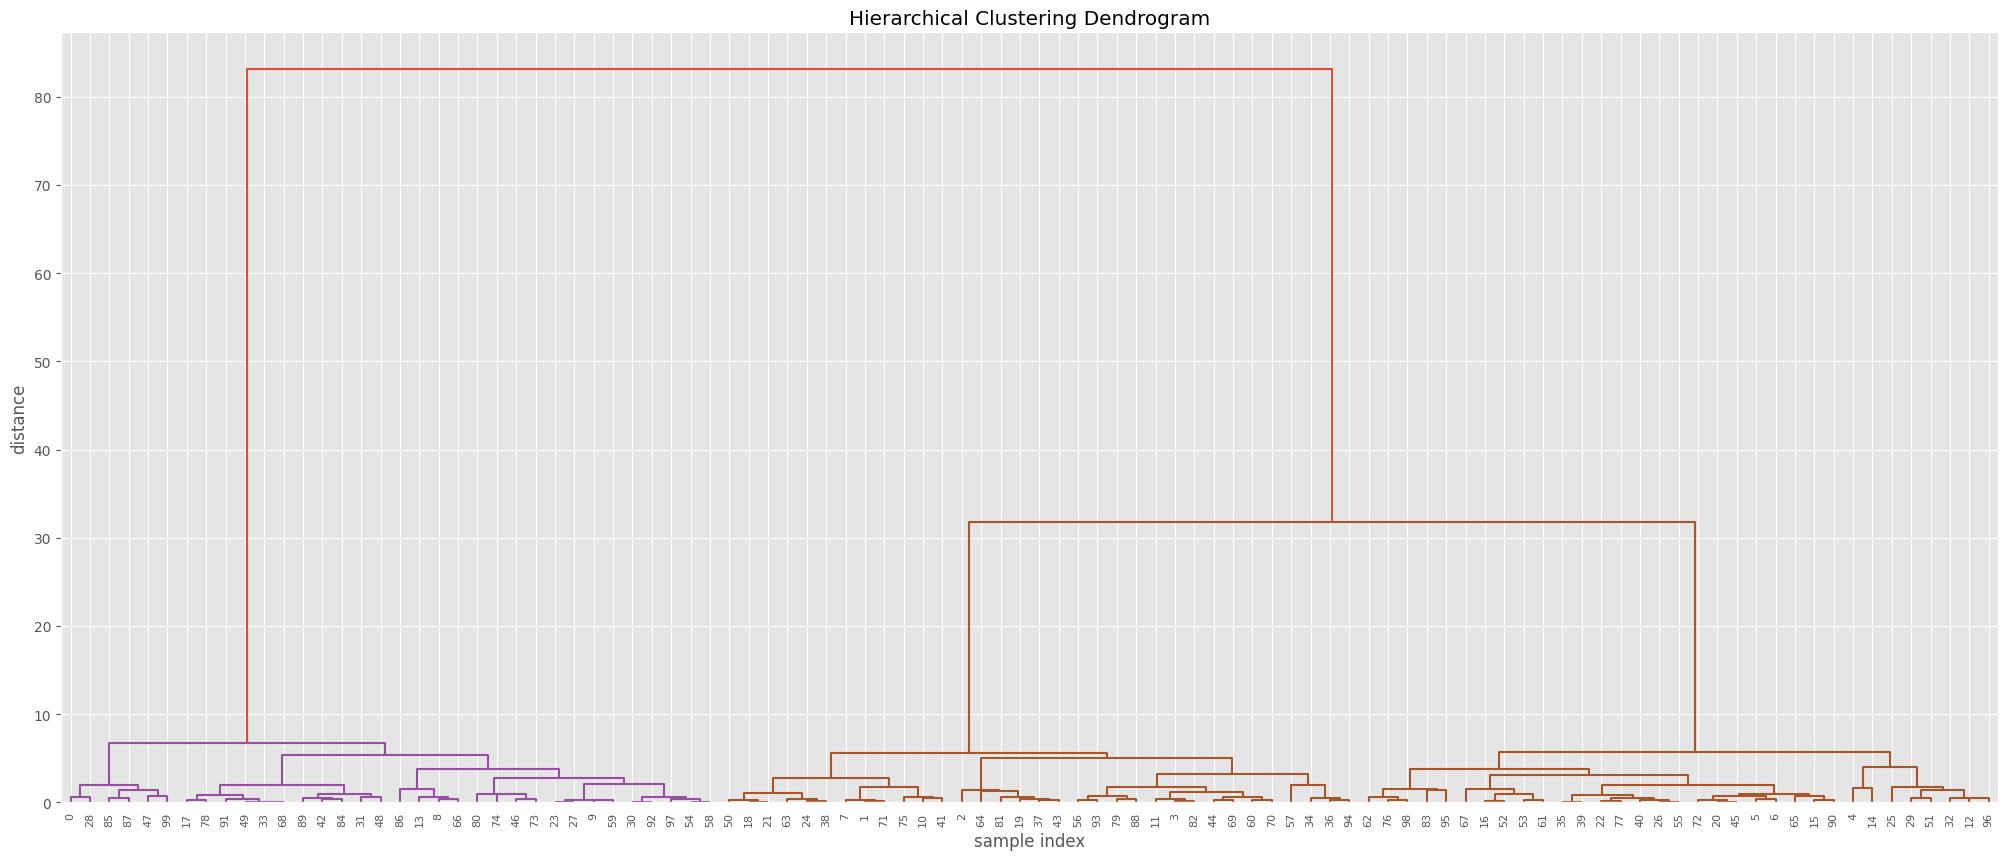

In [4]:
# dendrogram plot
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hierarchy.set_link_color_palette(color_array)
hierarchy.dendrogram(Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8. # font size for the x axis labels
)
plt.show()

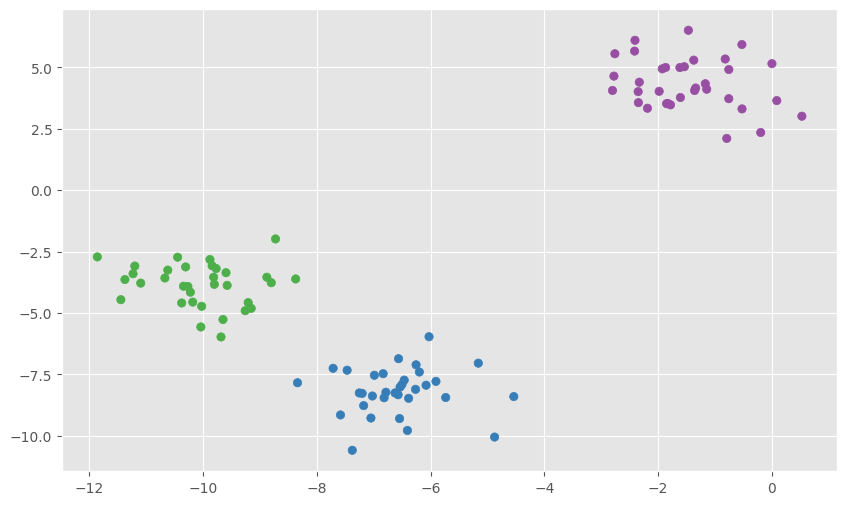

In [5]:
y_pred = hierarchy.fcluster(Z=Z, t=3, criterion='maxclust')
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap); 

## Example: two moons dataset

By default, agglomorative clustering doesn't take any connectivity into account. 

c:\Users\logan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


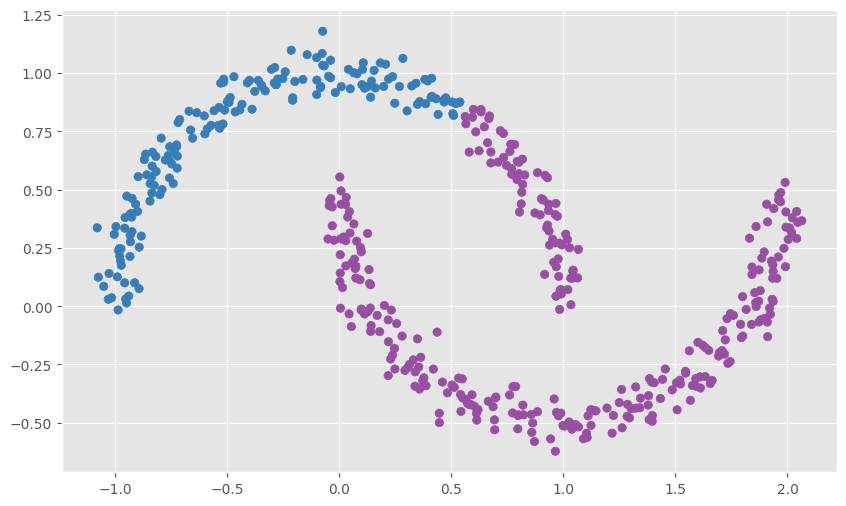

In [6]:
X_moons, y = make_moons(n_samples=500, noise=.05)

agg_cluster_model = AgglomerativeClustering(linkage="complete", affinity='euclidean', n_clusters=2)
y_pred = agg_cluster_model.fit_predict(X_moons)

plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_pred,  marker="o", cmap=cmap);

### Adding connectivity constraints

Previously, we joined clusters based soley on distance. Here we introduce a [connectivity constraint](http://scikit-learn.org/stable/auto_examples/cluster/plot_ward_structured_vs_unstructured.html#sphx-glr-auto-examples-cluster-plot-ward-structured-vs-unstructured-py) based on **k-Nearest Neighbors graph** so that only adjacent clusters can be merged together. 

c:\Users\logan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:575: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


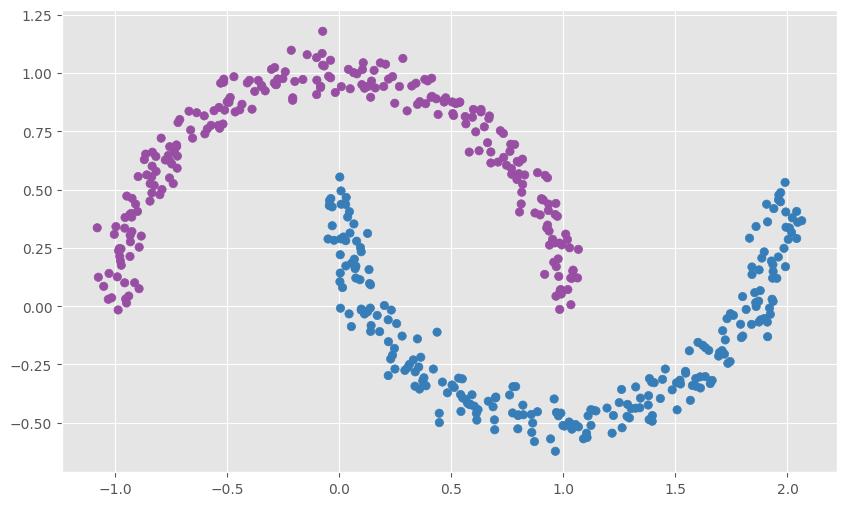

In [7]:
connectivity = kneighbors_graph(X_moons, n_neighbors=10, include_self=False)


agg_cluster_model = AgglomerativeClustering(linkage="complete", connectivity=connectivity, n_clusters=2,compute_full_tree=True)
y_pred = agg_cluster_model.fit_predict(X_moons)

plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_pred,  marker="o", cmap=cmap);

### Effect of connectivity constraints on various linkages

![Clustering without connectivity constraints](connectivity_plot1.png)
![Clustering with connectivity constraints](connectivity_plot2.png)

Image [source](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering.html#sphx-glr-auto-examples-cluster-plot-agglomerative-clustering-py) 

## Example: IRIS Dataset

Recall the Iris dataset consists of 4 measurements for 150 different examples of irises. We know that there are $k=3$  species of irises in the dataset. Without using the labels, let's try to find them. Note: this is a harder problem than classification since we're not using the (known) labels! 

In [8]:
# load dataset 
iris = load_iris()

X_iris = iris.data
y_iris = iris.target

c:\Users\logan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.7700836616487869

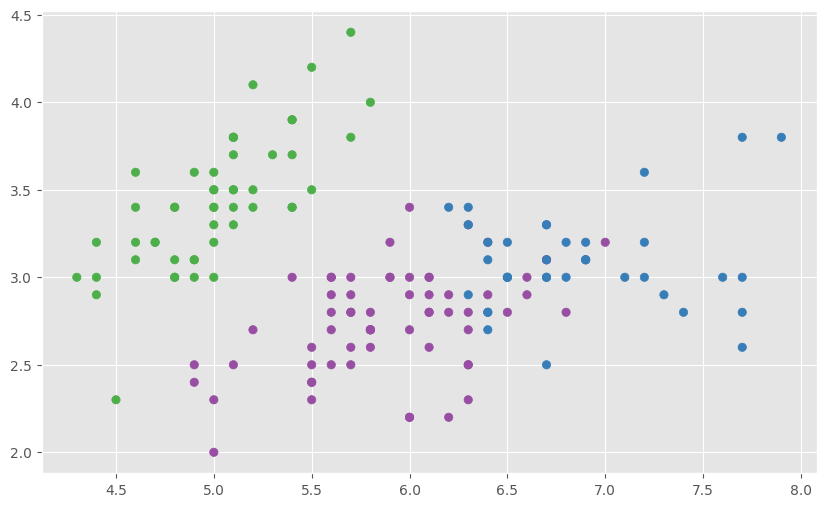

In [9]:
agg_cluster_model = AgglomerativeClustering(linkage="ward", affinity='euclidean', n_clusters=3)
y_pred = agg_cluster_model.fit_predict(X_iris)

plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_pred,  marker="o", cmap=cmap);
metrics.v_measure_score(labels_true=y_iris, labels_pred=y_pred)

Here's the plot with the ground truth labels: 

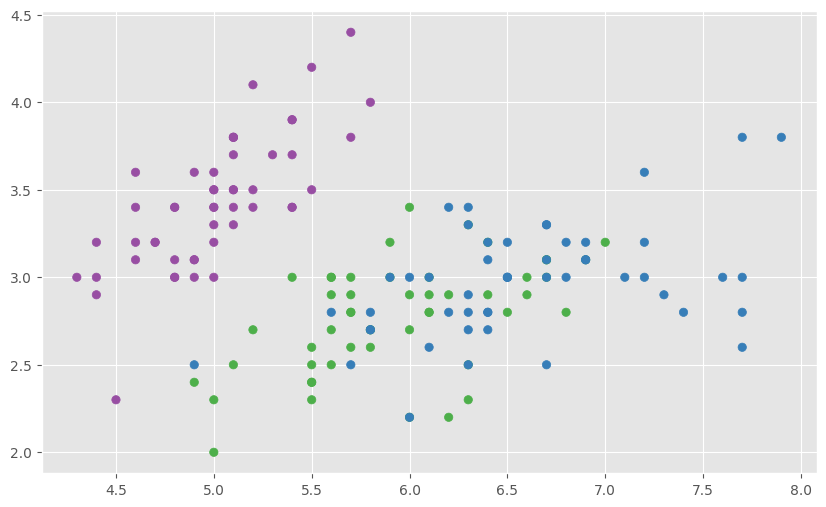

In [10]:
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris,  marker="o", cmap=cmap);

Remember that we're plotting only two dimensions of the dataset here, so it's tricky to see whether the clustering works well. 

A useful method to visuliaze a high-dimensional dataset are **cluster heatmaps**. Cluster heatmaps combine the dendrogram with a heat map, so you can judge the values of each dimension in a cluster. 

[Seaborn](https://seaborn.pydata.org/generated/seaborn.clustermap.html) provides a nice ready made cluster heatmap. This calles the scikit learn clustering algorithms behind the scenes. 

{'setosa': '#984ea3', 'versicolor': '#a65628', 'virginica': '#ffff33'}


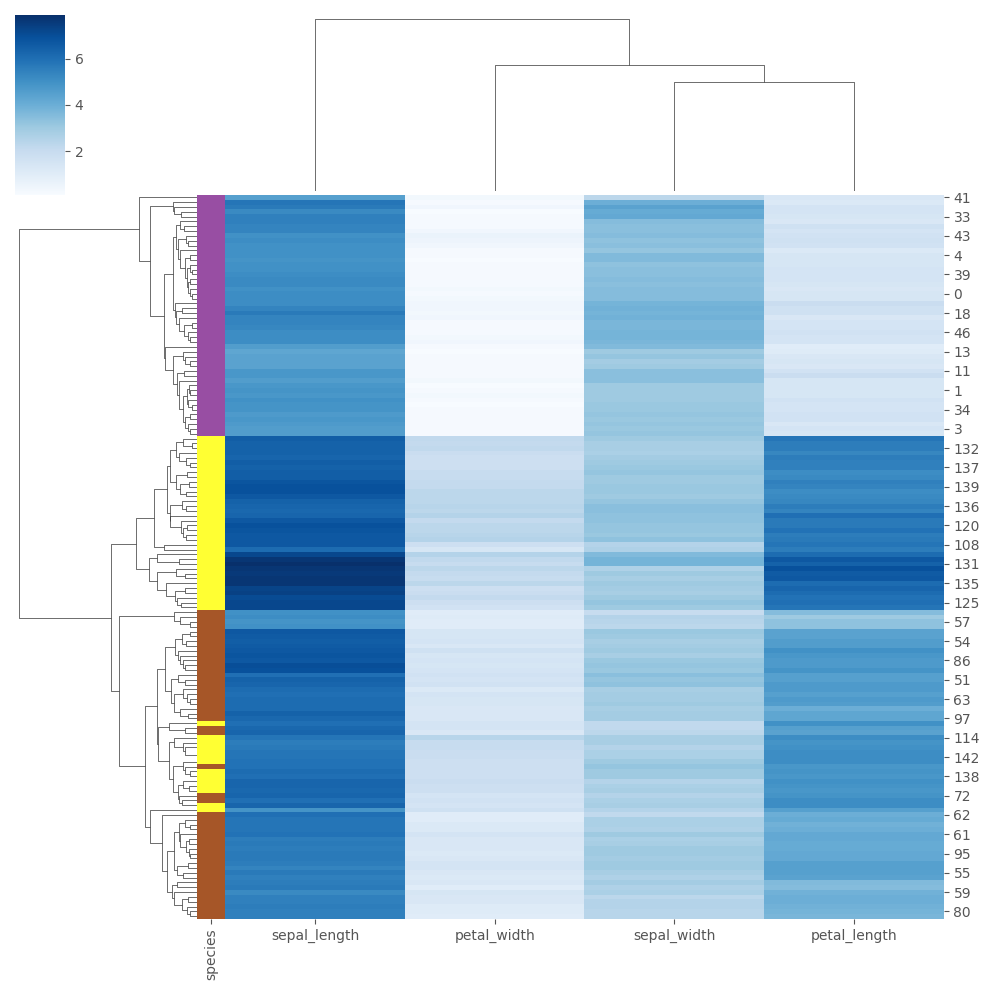

In [11]:
import seaborn as sns
iris = sns.load_dataset("iris")
species = iris.pop("species")

# the color for the labels
lut = dict(zip(species.unique(), color_array))
print(lut)
row_colors = species.map(lut)

# for method, try "single", "average", "ward"
# for method try "correlation", "euclidean", "cityblock"
g = sns.clustermap(iris, method="average", metric="euclidean", row_colors=row_colors, cmap="Blues")

If we add interactivity, we can also dynamically "cut" the dendrogram. See [this video](https://youtu.be/8SV3Id_lvNY?t=129), for example.  

### Evaluating the clusters

We can use the homogeneity/completeness/v-measure scores to evaluate our clusters. Here we'll try a couple of different configurations. 


In [12]:
homogeneity_completeness_v_measure(labels_true = y_iris, labels_pred = y_pred)

(0.7608008469718723, 0.7795958005591144, 0.7700836616487869)

We can now look at these scores for a couple of different parameters: 

In [13]:
models = [AgglomerativeClustering(linkage="ward", affinity='euclidean', n_clusters=3), 
         AgglomerativeClustering(linkage="average", affinity='euclidean', n_clusters=3), 
         AgglomerativeClustering(linkage="complete", affinity='euclidean', n_clusters=3), 
         AgglomerativeClustering(linkage="average", affinity='manhattan', n_clusters=3),
         AgglomerativeClustering(linkage="complete", affinity='manhattan', n_clusters=3),
         KMeans(n_clusters=3)]
h = np.zeros([len(models),3])
for i,m in enumerate(models):
    y_pred = m.fit_predict(X_iris)
    h[i,:] = homogeneity_completeness_v_measure(labels_true = y_iris, labels_pred = y_pred)
    print(h[i,:])

print('The winner is model #' + str(np.argmax(h[:,2]) + 1)
      + ' with V-Measure ' + str(np.max(h[:,2])))
print('Method details:')
print(models[np.argmax(h[:,0])])


[0.76080085 0.7795958  0.77008366]
[0.79598162 0.81564569 0.80569369]
[0.70011544 0.74543828 0.72206635]
[0.76959557 0.78590169 0.77766316]
[0.77817687 0.80358854 0.79067858]
[0.7514854  0.76498615 0.75817568]
The winner is model #2 with V-Measure 0.805693691215336
Method details:
AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)


c:\Users\logan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\logan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\logan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\logan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\logan\AppDa

We conclude that the average clustering method with the euclidean distance is the best match for this dataset. 

## DBScan

Density-based spatial clustering of applications with noise (DBSCAN) is an algorithm that is based on the premise that clusters are dense clouds of points, and that points that are in the same cluster should be connected by a high density region. 

We need to choose two parameters: 
 * $\epsilon$, a measure for distance between two points, and 
 * *minPoints*, a measure for the minimum number of points in a cluster.

Here is how the algorithm works:

 1. We start by picking a random point in our dataset. 
 2. We look how many points are within the distance $\epsilon$ of that point. If there are more than *minPoints* we create a cluster and add all of those points. If not, we consider the point an outlier and move on to step 4. 
 3. We check all new points using step 2 and add those neighbors and continue recursively doing so until no more points can be added. 
 4. When we run out of points, we pick a new random point from the set of points that doesn't belong to a cluster. 

DBSCAN is notable for it's explicit treatment of outliers and for its ability to work with complex shapes. 
 

We can take a look at an interactive illustration:
https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/ 
 
 
Scikit-learn also has a [DBSCAN implemetation](https://scikit-learn.org/stable/modules/clustering.html#dbscan). Note the outliers shown in the examples below. 





Estimated number of clusters: 5
Estimated number of noise points: 3
Homogeneity: 0.951
Completeness: 0.826
V-measure: 0.884


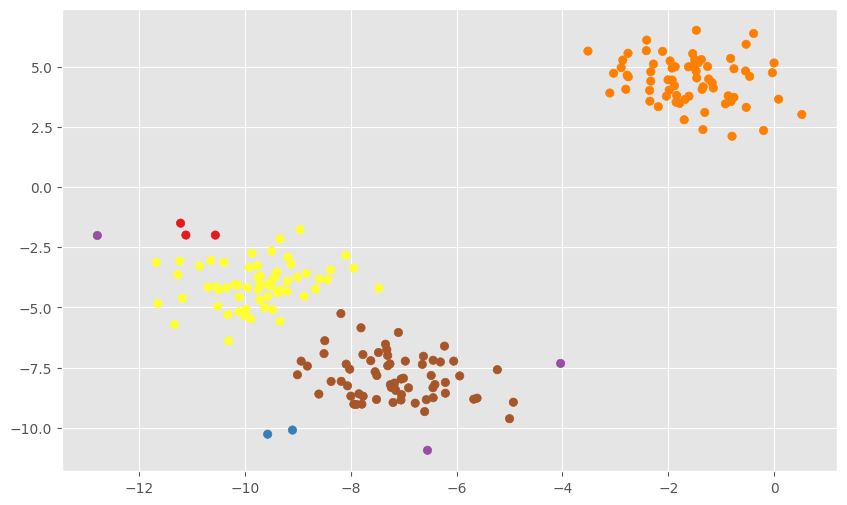

In [14]:
from sklearn.cluster import DBSCAN

X, y = make_blobs(n_samples=200, centers=3, random_state=1)

# try changeing eps and min_samples
db_model = DBSCAN(eps=1.0, min_samples=2)
db_model.fit(X)
y_pred = db_model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap); 

labels = db_model.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))

DBSCAN works well for uneven sized clusters:

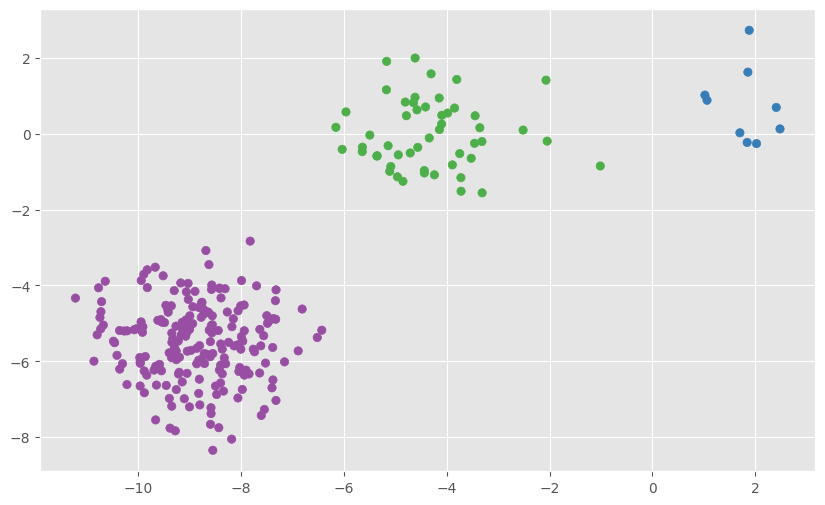

In [15]:
X, y = make_blobs(n_samples=1000, centers=3, random_state=170)

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:200], X[y == 1][:50], X[y == 2][:10]))


# try changeing eps and min_samples
db_model = DBSCAN(eps=1.5, min_samples=5)
db_model.fit(X_filtered)
y_pred = db_model.fit_predict(X_filtered)

plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred,  marker="o", cmap=cmap); 

It also works well for non-convex shapes, no extra tricks required.

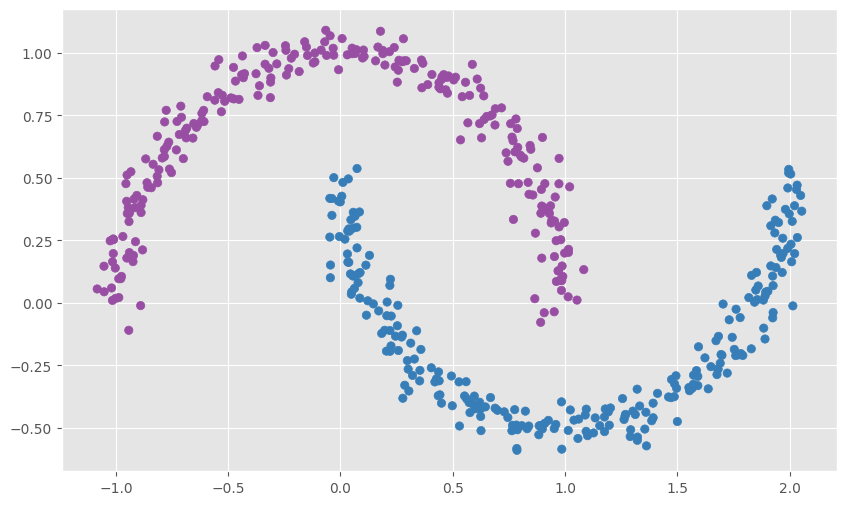

In [16]:
X_moons, y = make_moons(n_samples=500, noise=.05)

# try changeing eps and min_samples
db_model = DBSCAN(eps=0.2, min_samples=5)
db_model.fit(X_moons)
y_pred = db_model.fit_predict(X_moons)

plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_pred,  marker="o", cmap=cmap); 

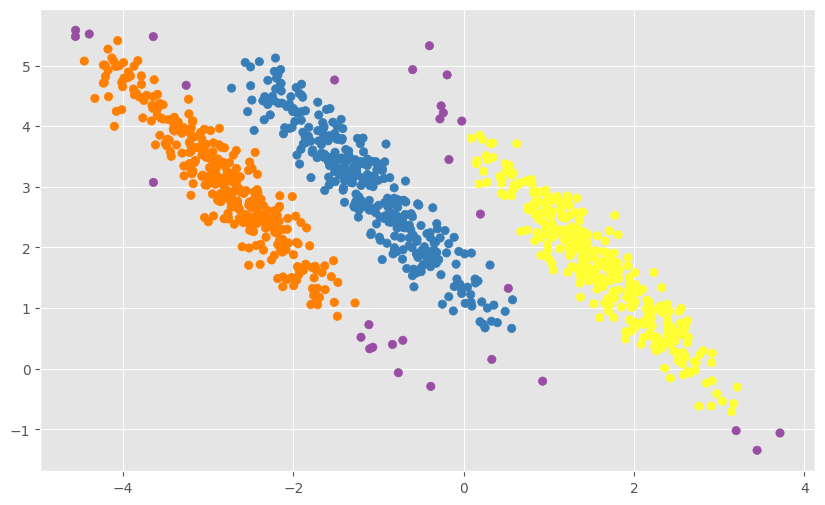

In [17]:
X, y = make_blobs(n_samples=1000, centers=3, random_state=3)

# Anisotropically distributed data
transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

# try changeing eps and min_samples
db_model = DBSCAN(eps=0.30, min_samples=5)
db_model.fit(X_aniso)
y_pred = db_model.fit_predict(X_aniso)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred,  marker="o", cmap=cmap); 

For the Iris dataset, it's hard for DBSCAN to tease apart the two correlated species. 

0.6124353984410543

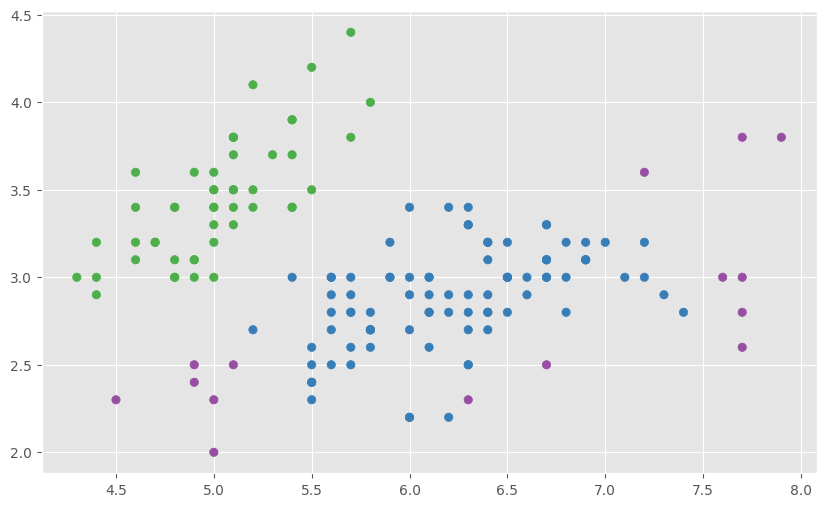

In [18]:
dbscan_cluster_model = DBSCAN(eps=0.55, min_samples=8)
y_pred = dbscan_cluster_model.fit_predict(X_iris)

plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_pred,  marker="o", cmap=cmap);
metrics.v_measure_score(labels_true=y_iris, labels_pred=y_pred)

DBScan doesn't work with clusters of unequal density. 

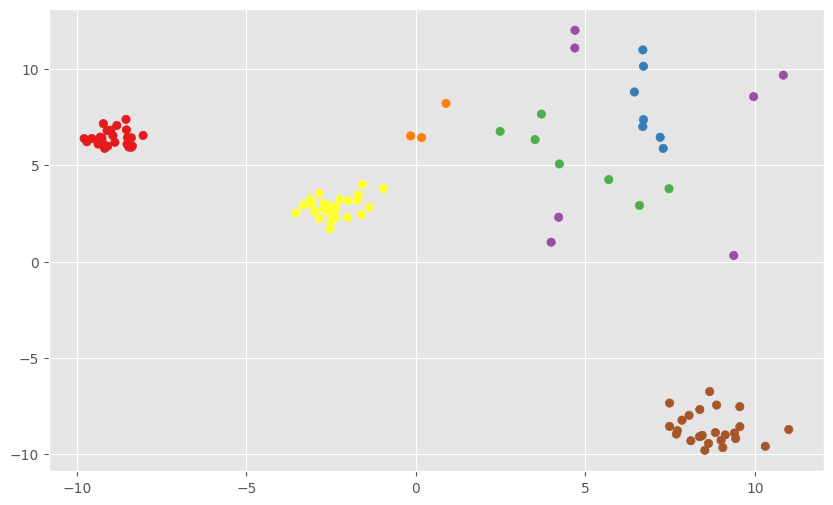

In [19]:
X, y = make_blobs(n_samples=100, centers=4, cluster_std=[0.7, 1, 3, 0.4], random_state=112)

# Unevenly spread blobs
y_pred = DBSCAN(eps=2, min_samples=3).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);

Pros of DBSCAN: 

* Works for non-gaussian shapes. 
* Explicitly deals with outliers.
* We don't have to specify the nubmer of clusters. 

Cons: 

* Sensitve to parameters.
* Cannot cluster datasets with differences in densities between clusters – we have only one epsilon.

## Class Exercise: MNIST dataset